# Russian Qudits

<img src="https://rqc.ru/static/RQClogo_black_ru.png" alt="drawing" height="300">

## Annotation

The following notebook shows qudits, gates and channels for variational cirquits

Author: Artem Kuzmichev, Quantum Research Scientist, RQC

In [ ]:
!pip install cirq --quiet --no-warn-conflicts

     |████████████████████████████████| 66 kB 4.3 MB/s 
     |████████████████████████████████| 577 kB 51.4 MB/s 
     |████████████████████████████████| 594 kB 74.7 MB/s 
     |████████████████████████████████| 57 kB 6.0 MB/s 
     |████████████████████████████████| 1.8 MB 71.4 MB/s 
     |████████████████████████████████| 120 kB 79.1 MB/s 
     |████████████████████████████████| 221 kB 57.8 MB/s 
     |████████████████████████████████| 44 kB 3.2 MB/s 
     |████████████████████████████████| 229 kB 63.8 MB/s 
     |████████████████████████████████| 147 kB 67.7 MB/s 
     |████████████████████████████████| 84 kB 4.3 MB/s 
     |████████████████████████████████| 49 kB 6.6 MB/s 
     |████████████████████████████████| 69 kB 9.0 MB/s 
     |████████████████████████████████| 80 kB 10.8 MB/s 
     |████████████████████████████████| 58 kB 7.3 MB/s 
     |████████████████████████████████| 119 kB 52.5 MB/s 
     |████████████████████████████████| 1.6 MB 76.7 MB/s 
     |███████████████████████

In [ ]:
import random
import sympy
import numpy as np

import cirq
from cirq.contrib.svg import SVGCircuit

## My qudit library


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/RQC_Tasks/Qudits/qudit-vqc'

/content/drive/MyDrive/RQC_Tasks/Qudits/qudit-vqc


In [ ]:
from qudit_gates import *
from qudit_depolarization_channels import *
from qudit_variational_qc import *

##Qudits


We are going to study implementation of qudits for variational circuits. Since the real device we have in FIAN is two-qudit quantim computer with d=4 (ququarts), it appears reasonable to choose this specific value

In [ ]:
d = 4
n = 2

qudits = cirq.LineQid.range(n, dimension=d)
q0, q1 = qudits

print(qudits)

[cirq.LineQid(0, dimension=4), cirq.LineQid(1, dimension=4)]


##Ququart gates

In [ ]:
simulator = cirq.Simulator()

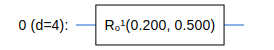

array([0.9950042 +0.j        , 0.04786269-0.08761206j,
       0.        +0.j        , 0.        +0.j        ], dtype=complex64)

In [ ]:
circuit = cirq.Circuit(
    QuditRGate(0, 1, 0.2, 0.5).on(q0)
)

display(SVGCircuit(circuit))

result = simulator.simulate(circuit)
result.final_state_vector

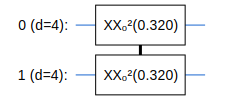

array([0.98722726+0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        -0.15931821j, 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ], dtype=complex64)

In [ ]:
circuit = cirq.Circuit(
   QuditXXGate(0, 2, 0.32).on(q0, q1)
)
display(SVGCircuit(circuit))

result = simulator.simulate(circuit)
result.final_state_vector

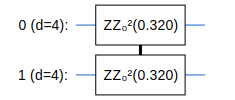

array([0.98722726-0.15931821j, 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ], dtype=complex64)

In [ ]:
circuit = cirq.Circuit(
   QuditZZGate(0, 2, 0.32).on(q0, q1)
)

display(SVGCircuit(circuit))

result = simulator.simulate(circuit)
result.final_state_vector

In [4]:
circuit = cirq.Circuit(
    QuditBarrier().on(q0, q1)
)

display(SVGCircuit(circuit))

result = simulator.simulate(circuit)
result.final_state_vector

NameError: ignored

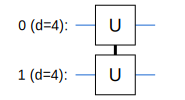

array([ 0.09198611+0.09748124j,  0.0649102 +0.20749675j,
       -0.04493232+0.06023369j,  0.16114339-0.01233532j,
       -0.19518903-0.0599068j , -0.04103287-0.21692097j,
       -0.10022357+0.14532454j,  0.02210486-0.03926441j,
       -0.02015586-0.19364257j, -0.07748839+0.0885432j ,
       -0.26999977-0.09650195j, -0.16126318+0.01762975j,
        0.50685704+0.1045097j , -0.3617387 -0.05377077j,
       -0.23468958-0.35366368j, -0.19281855-0.01397113j], dtype=complex64)

In [ ]:
circuit = cirq.Circuit(
    QuditArbitraryUnitary().on(q0, q1)
)

display(SVGCircuit(circuit))

result = simulator.simulate(circuit)
result.final_state_vector

##Depolarizing channels


Parameter p of the depolarizing channel can be restored from experimentally mesured fidelities of single-qudit and two-qudit operations. From
\begin{equation}
    f = 1 - p +  \frac{p}{d^2}
\end{equation}
we obtain:
\begin{equation}
    p = \left(1 -  \frac{1}{d^2}\right)^{-1} \cdot \left(1 - f \right)
\end{equation}

For single-qudit operations

In [ ]:
f1 = 0.99
p1 = (1 - f1) / (1 - 1 / d ** 2)
p1

0.010666666666666677

For two-qudit operations

In [ ]:
f2 = 0.96
p2 = (1 - f2) / (1 - 1 / (d ** 2) ** 2)
p2

0.040156862745098075

In [ ]:
dmsimulator = cirq.DensityMatrixSimulator()

Single-qudit channel

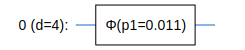

array([[0.99200004+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j],
       [0.        +0.j, 0.00266667+0.j, 0.        +0.j, 0.        +0.j],
       [0.        +0.j, 0.        +0.j, 0.00266667+0.j, 0.        +0.j],
       [0.        +0.j, 0.        +0.j, 0.        +0.j, 0.00266667+0.j]],
      dtype=complex64)

In [ ]:
circuit = cirq.Circuit(
    QuquartDepolarizingChannel().on(q0)
)

display(SVGCircuit(circuit))

result = dmsimulator.simulate(circuit)
result.final_density_matrix

Two-qudit channel

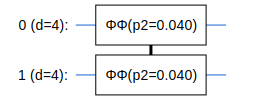

array([[0.96235317+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j],
       [0.        +0.j, 0.0025098 +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j],
       [0.        +0.j, 0.        +0.j, 0.0025098 +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j],
       [0.        +0.j, 0.        +0.j, 0.        +0.j, 0.0025098 +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.   

In [ ]:
circuit = cirq.Circuit(
    DoubleQuquartDepolarizingChannel().on(q0, q1)
)

display(SVGCircuit(circuit))

result = dmsimulator.simulate(circuit)
result.final_density_matrix